<a href="https://colab.research.google.com/github/he-yilan/COVID19_HousholdSizeModeling/blob/master/Impact_of_Household_Size_on_Spread_of_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Impact of Household Size on Spread of COVID-19
Elana Ho, Sarah Cao, Andrea Tsai, Prady Raja, Aksh Garg

##Imports

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline     
!pip install mpld3   
import mpld3         
mpld3.enable_notebook() 
import math
import pandas as pd

In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N #finding derivative of S 
    dIdt = beta * S * I / N - gamma * I #finding derivative of I
    dRdt = gamma * I #finding derivative of R
    return dSdt, dIdt, dRdt

##Parameters



##Control 
Average household size = 2.52

In [ ]:
S2 = []
I2 = []
R2 = []

N = 328239523/2.52 #total population
D = 7 #how long the infection lasts 
beta = 1.15/ D #Rt of 1.15/7 days 
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 2.52
S0, I0, R0 = 325598897/2.52, 2640626/2.52, 1282378/2.52  

In [ ]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)

Control_R0 = 1.15

In [ ]:
print(beta)

0.16428571428571428


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 


In [ ]:
for i in range(len(I)):
  recovered = R[i]*2.52 #convert households to individuals 
  infected = I[i]*2.52 #convert households to individuals
  susceptible = S[i]*2.52 #convert households to individuals
  stillS = (infected-I[i])*0.6045 #uninfected people in household with 1 infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.3955 #SAR = 39.55%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [ ]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('controlTrial.csv')

In [ ]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

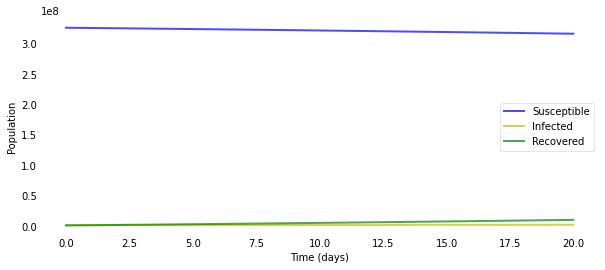

In [ ]:
plotsir(t, S2, I2, R2)

##Trial 1
Average household size = 1

In [ ]:
N = 328239523 #total population
D = 7 #how long the infection lasts 
beta = 1.15/ D #Rt of 1.15/7 days 
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1
S0, I0, R0 = 325598897, 2640626, 1282378 

In [ ]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 1.5548922528454303
Changed R0: 1.2142240865250469
Changed beta: 0.1734605837892924
beta: 0.1734605837892924


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [ ]:
data = {'Days': t, 'Susceptible': S, 'Infected': I, 'Recovered': R}
df = pd.DataFrame(data)
df.to_csv('trial1.csv')

In [ ]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

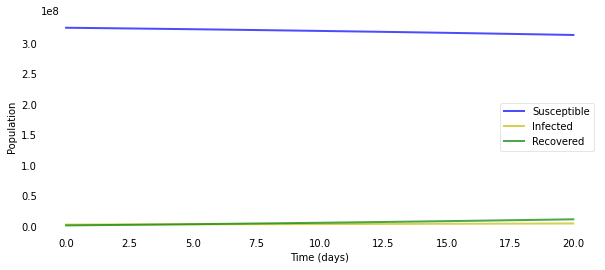

In [ ]:
plotsir(t, S, I, R)

##Trial 2
Average household size = 2

In [ ]:
S2 = []
I2 = []
R2 = []

N = 328239523/2 #total population
D = 7 #how long the infection lasts 
beta = 1.15/ D #Rt of 1.15/7 days 
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 2
S0, I0, R0 = 325598897/2, 2640626/2, 1282378/2 

In [ ]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863 #1.1534917120638863 is the standard log of density 
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 1.2538622571814493
Changed R0: 1.16605928721881
Changed beta: 0.1665798981741157
beta: 0.1665798981741157


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [ ]:
for i in range(len(I)):
  recovered = R[i]*2 #convert households to individuals 
  infected = I[i]*2 #convert households to individuals
  susceptible = S[i]*2 #convert households to individuals
  stillS = (infected-I[i])*0.564 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.436 #SAR = 43.6%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [ ]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial2.csv')

In [ ]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

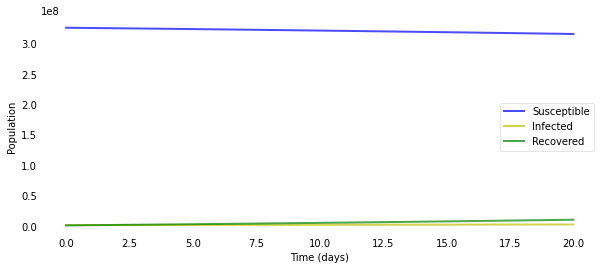

In [ ]:
plotsir(t, S2, I2, R2)

##Trial 3 
Average household size = 3

In [ ]:
S2 = []
I2 = []
R2 = []
 
N = 328239523/3 #total population
D = 7 #how long the infection lasts 
beta = 1.15/ D #Rt of 1.15/7 days 
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 3
S0, I0, R0 = 325598897/3, 2640626/3, 1282378/3  

In [ ]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863 #1.1534917120638863 is the standard log of density 
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 1.077770998125768
Changed R0: 1.137884685769901
Changed beta: 0.16255495510998585
beta: 0.16255495510998585


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
t = np.linspace(0, 20, 21) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [ ]:
for i in range(len(I)):
  recovered = R[i]*3 #convert households to individuals 
  infected = I[i]*3 #convert households to individuals
  susceptible = S[i]*3 #convert households to individuals
  stillS = (infected-I[i])*0.645 #uninfected people in household with infected member. 1-0.355
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.355 #SAR = 35.5%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [ ]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial3.csv')

In [ ]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

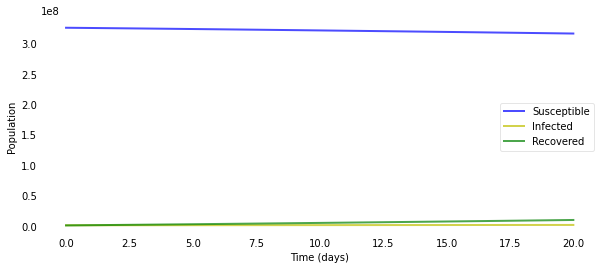

In [ ]:
plotsir(t, S2, I2, R2)

##Trial 4
Average household size = 4

In [ ]:
S2 = []
I2 = []
R2 = []

N = 328239523/4 #total population
D = 7 #how long the infection lasts 
beta = 1.15/ D #Rt of 1.15/7 days 
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 4
S0, I0, R0 = 325598897/4, 2640626/4, 1282378/4

In [ ]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863 #1.1534917120638863 is the standard log of density 
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 0.952832261517468
Changed R0: 1.117894487912573
Changed beta: 0.15969921255893899
beta: 0.15969921255893899


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
t = np.linspace(0, 20, 21) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [ ]:
for i in range(len(I)):
  recovered = R[i]*4 #convert households to individuals 
  infected = I[i]*4 #convert households to individuals
  susceptible = S[i]*4 #convert households to individuals
  stillS = (infected-I[i])*0.796 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.204 #SAR = 20.4%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [ ]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial4.csv')

In [ ]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

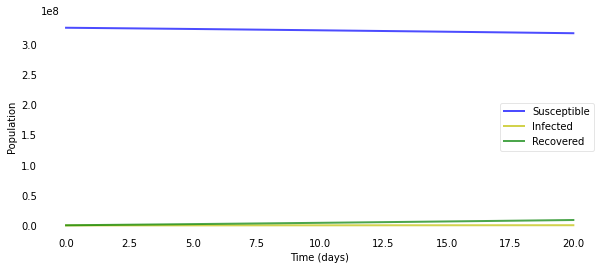

In [ ]:
plotsir(t, S2, I2, R2)

##Trial 5
Average household size = 5

In [ ]:
S2 = []
I2 = []
R2 = []

N = 328239523/5
D = 7 #how long the infection lasts 
beta = 1.15/ D #Rt of 1.15/7 days 
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 5
S0, I0, R0 = 325598897/5, 2640626/5, 1282378/5 #232935.999408716  

In [ ]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863 #1.1534917120638863 is the standard log of density 
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 0.8559222485094116
Changed R0: 1.102388885831284
Changed beta: 0.15748412654732627
beta: 0.15748412654732627


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [ ]:
for i in range(len(I)):
  recovered = R[i]*5 #convert households to individuals 
  infected = I[i]*5 #convert households to individuals
  susceptible = S[i]*5 #convert households to individuals
  stillS = (infected-I[i])*0.796 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.204 #SAR = 20.4%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [ ]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial5.csv')

In [ ]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

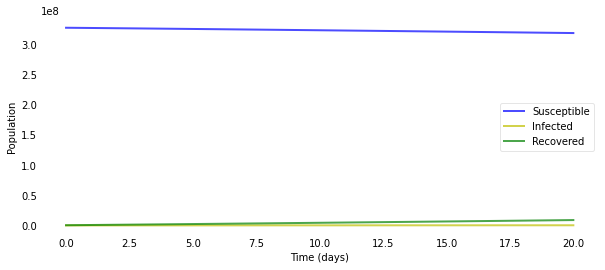

In [ ]:
plotsir(t, S2, I2, R2)

##Trial 6
Average household size = 6

In [ ]:
S2 = []
I2 = []
R2 = []

N = 328239523/6 #total population
D = 7 #how long the infection lasts 
beta = 1.15/ D #Rt of 1.15/7 days 
gamma = 1.0 / D #proportion of infected recovering per day

# initial conditions: S, I, R on 7/1 divided by 6
S0, I0, R0 = 325598897/6, 2640626/6, 1282378/6 #194113.332840596  

In [ ]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))
#1.1534917120638863 is the standard log of density 


#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 0.7767410024617867
Changed R0: 1.089719886463664
Changed beta: 0.15567426949480911
beta: 0.15567426949480911


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T 

In [ ]:
for i in range(len(I)):
  recovered = R[i]*6 #convert households to individuals 
  infected = I[i]*6 #convert households to individuals
  susceptible = S[i]*6 #convert households to individuals
  stillS = (infected-I[i])*0.796 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.204 #SAR = 20.4%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [ ]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial6.csv')

In [ ]:
def plotsir(t, S2, I2, R2):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I2, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

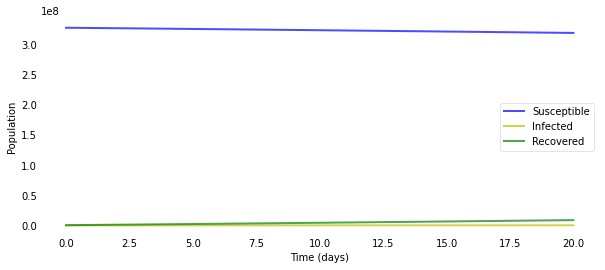

In [ ]:
plotsir(t, S2, I2, R2)

##Trial 7
Average household size = 7

In [ ]:
S2 = []
I2 = []
R2 = []

N = 328239523/7
D = 7 #how long the infection lasts 
beta = 1.15/ D #Rt of 1.15/7 days 
gamma = 1.0 / D #proportion of infected recovering per day

S0, I0, R0 = 325598897/7, 2640626/7, 1282378/7  # initial conditions: S, I, R on 7/1 divided by 7

In [ ]:
#population density and its log
Density = N / 9147420.0
Log_Density = math.log10(Density)
print("Log of population density: " + str(Log_Density))
#1.1534917120638863 is the standard log of density 

#calculation for change in R0
Increase_in_Density = Log_Density - 1.1534917120638863
Changed_R0 = 1.15 + 0.16*Increase_in_Density
print("Changed R0: " + str(Changed_R0))

#conversion of changed R0 to changed beta
Changed_beta = Changed_R0 * gamma
print("Changed beta: " + str(Changed_beta))

#have to run this cell again to put in changed beta
beta = Changed_beta
#beta should equal Changed_beta
print("beta: " + str(beta))

Log of population density: 0.7097942128311735
Changed R0: 1.0790084001227658
Changed beta: 0.15414405716039511
beta: 0.15414405716039511


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
t = np.linspace(0, 20, 21) # Grid of time in days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over t
ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #takes formulas, initial conditions, variables (N, beta, gamma), and calculates S, I, R for 21 days
S, I, R = ret.T

In [ ]:
for i in range(len(I)):
  recovered = R[i]*7 #convert households to individuals 
  infected = I[i]*7 #convert households to individuals
  susceptible = S[i]*7 #convert households to individuals
  stillS = (infected-I[i])*0.909 #uninfected people in household with infected member
  totalS = stillS + susceptible #total susceptible including whole + parts of households
  infected2 = (infected-I[i])*0.091 #SAR = 9.1%; infected contacts of reps
  totalI = infected2 + I[i] 

  S2.insert(i, totalS)
  I2.insert(i, totalI)
  R2.insert(i, recovered)

In [ ]:
data = {'Days': t, 'Susceptible': S2, 'Infected': I2, 'Recovered': R2}
df = pd.DataFrame(data)
df.to_csv('trial7.csv')

In [ ]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

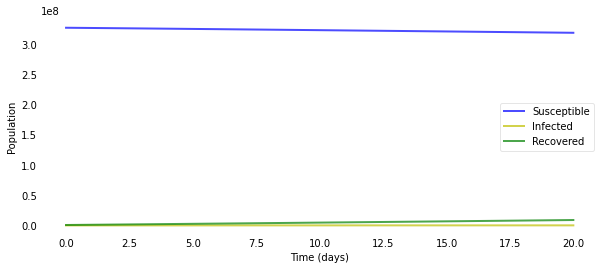

In [ ]:
plotsir(t, S2, I2, R2)
#Why are these #s less than the #s of a household size of 2.5?

##Results



Below are the results of the graphs

 The X axis is days from July 1st and the Y axis is number of individuals. Each line is the number of individuals either infected, recovered, or susceptible.

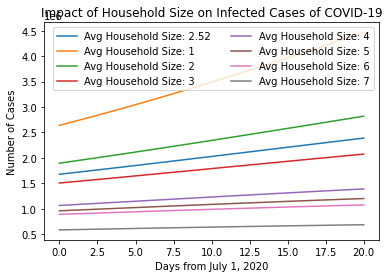

In [ ]:
control = pd.read_csv('/content/controlTrial.csv')
trial1 = pd.read_csv('/content/trial1.csv')
trial2 = pd.read_csv('/content/trial2.csv')
trial3 = pd.read_csv('/content/trial3.csv')
trial4 = pd.read_csv('/content/trial4.csv')
trial5 = pd.read_csv('/content/trial5.csv')
trial6 = pd.read_csv('/content/trial6.csv')
trial7 = pd.read_csv('/content/trial7.csv')

x = control.Days

y0 = control.Infected
y1 = trial1.Infected
y2 = trial2.Infected
y3 = trial3.Infected
y4 = trial4.Infected
y5 = trial5.Infected
y6 = trial6.Infected
y7 = trial7.Infected

plt.plot(x, y0, label="Avg Household Size: 2.52")
plt.plot(x, y1, label="Avg Household Size: 1")
plt.plot(x, y2, label="Avg Household Size: 2")
plt.plot(x, y3, label="Avg Household Size: 3")
plt.plot(x, y4, label="Avg Household Size: 4")
plt.plot(x, y5, label="Avg Household Size: 5")
plt.plot(x, y6, label="Avg Household Size: 6")
plt.plot(x, y7, label="Avg Household Size: 7")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Cases")
plt.title("Impact of Household Size on Infected Cases of COVID-19")

plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1), ncol= 2)

plt.savefig('infected.png', dpi = 300)
plt.show()

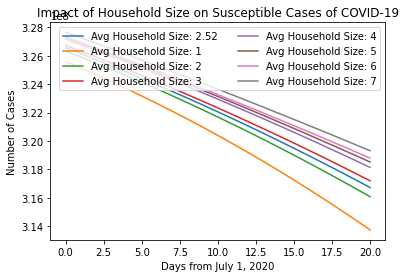

In [ ]:
y0 = control.Susceptible
y1 = trial1.Susceptible
y2 = trial2.Susceptible
y3 = trial3.Susceptible
y4 = trial4.Susceptible
y5 = trial5.Susceptible
y6 = trial6.Susceptible
y7 = trial7.Susceptible

plt.plot(x, y0, label="Avg Household Size: 2.52")
plt.plot(x, y1, label="Avg Household Size: 1")
plt.plot(x, y2, label="Avg Household Size: 2")
plt.plot(x, y3, label="Avg Household Size: 3")
plt.plot(x, y4, label="Avg Household Size: 4")
plt.plot(x, y5, label="Avg Household Size: 5")
plt.plot(x, y6, label="Avg Household Size: 6")
plt.plot(x, y7, label="Avg Household Size: 7")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Cases")
plt.title("Impact of Household Size on Susceptible Cases of COVID-19")

plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1), ncol= 2)

plt.savefig('susceptible.png', dpi = 300)
plt.show()

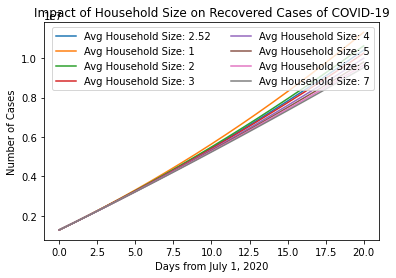

In [ ]:
y0 = control.Recovered
y1 = trial1.Recovered
y2 = trial2.Recovered
y3 = trial3.Recovered
y4 = trial4.Recovered
y5 = trial5.Recovered
y6 = trial6.Recovered
y7 = trial7.Recovered

plt.plot(x, y0, label="Avg Household Size: 2.52")
plt.plot(x, y1, label="Avg Household Size: 1")
plt.plot(x, y2, label="Avg Household Size: 2")
plt.plot(x, y3, label="Avg Household Size: 3")
plt.plot(x, y4, label="Avg Household Size: 4")
plt.plot(x, y5, label="Avg Household Size: 5")
plt.plot(x, y6, label="Avg Household Size: 6")
plt.plot(x, y7, label="Avg Household Size: 7")

plt.xlabel("Days from July 1, 2020")
plt.ylabel("Number of Cases")
plt.title("Impact of Household Size on Recovered Cases of COVID-19")

plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1), ncol= 2)

plt.savefig('recovered.png', dpi = 300)
plt.show()